# Перетворення Лагера

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

## Многочлени Лагера (1.5.1)

In [233]:
def laguerre_polymonials(
        t: float,
        n: int,
        beta: float = 2.0,
        sigma: float = 4.0
) -> float:
    """
    Функція для рекурсивного обчислення многочленів Лагера
    
    :param t:       Значення аргументу
    :param n:       Степінь многочлена Лагера
    :param beta:    Параметр бета
    :param sigma:   Параметр сигма
    
    :return:        Значення многочлена Лагера
    """

    # Валідація вхідних даних
    if beta < 0:
        raise ValueError('Value "beta" must be positive')

    if sigma < beta:
        raise ValueError('Value "sigma" must be greater than beta')

    if n < 0:
        raise ValueError('Value "n" must be positive')

    # Найкращі випадки
    l_prev_prev = np.sqrt(sigma) * np.exp(-beta * t / 2)
    l_prev = np.sqrt(sigma) * (1 - sigma * t) * np.exp(-beta * t / 2)
    if n == 0:
        return l_prev_prev
    if n == 1:
        return l_prev

    # Обчислення
    for i in range(2, n + 1):
        temp = l_prev
        l_prev = (2 * i - 1 - sigma * t) * l_prev / i - (i - 1) * l_prev_prev / i
        l_prev_prev = temp

    return l_prev

In [234]:
laguerre_polymonials(
    t=2,
    n=2,
    beta=2,
    sigma=4
)

4.601399630044832

## Табуляція многочленів Лагера (1.5.2)

In [235]:
def laguerre_polynomials_tabulation(
        n: int,
        t_max: float,
        t_step: float = 0.1,
        beta: float = 2.0,
        sigma: float = 4.0
) -> pd.DataFrame:
    """
    Функція для табуляції многочленів Лагера
    
    :param n:       Степінь многочлена Лагера
    :param t_max:   Максимальне значення аргументу
    :param t_step:  Крок аргументу
    :param beta:    Параметр бета
    :param sigma:   Параметр сигма
    
    :return:        DataFrame з табульованими значеннями
    """

    # Валідація вхідних даних
    if beta < 0:
        raise ValueError('Value "beta" must be positive')

    if sigma < beta:
        raise ValueError('Value "omega" must be greater than beta')

    if n < 0:
        raise ValueError('Value "n" must be positive')

    if t_max < 0:
        raise ValueError('Value "t_max" must be positive')

    if t_step < 0:
        raise ValueError('Value "t_step" must be positive')

    # Табуляція
    t = np.arange(0, t_max, t_step)
    return pd.DataFrame(
        data={
            't': t,
            f'L_{n}': [laguerre_polymonials(t=i, n=n, beta=beta, sigma=sigma) for i in t]
        }
    ).set_index('t')

In [236]:
laguerre_polynomials_tabulation(
    n=2,
    t_max=10
)

,L_2
t,
0.0,2.000000
0.1,0.506709
0.2,-0.458489
0.3,-1.007513
0.4,-1.233389
...,...
9.5,0.096858
9.6,0.089602
9.7,0.082870


## Обчислювальний експеримент (1.5.3)

In [237]:
def experiment(
        n_max: int = 20,
        epsilon: float = 1e-3,
        t_max: float = 100,
        t_points: int = 1000,
        beta: float = 2.0,
        sigma: float = 4.0
) -> tuple[float, pd.DataFrame]:
    """
    Функція для проведення обчислювального експерименту. Пошук такого t, що |laguerre_polymonials(n, t)| < epsilon для усiх n Є [0, N]
    
    :param n_max:       Верхня межа степеня многочлена Лагера
    :param epsilon:     Точність
    :param t_max:       Максимальне значення аргументу
    :param t_points:    Кількість точок для від 0 до t_max
    :param beta:        Параметр бета
    :param sigma:       Параметр сигма
    
    :return:            Кортеж з t та DataFrame з табульованими значеннями
    """

    # Валідація вхідних даних
    if n_max < 0:
        raise ValueError('Value "N" must be positive')

    if epsilon < 0:
        raise ValueError('Value "epsilon" must be positive')

    if t_max < 0:
        raise ValueError('Value "t_max" must be positive')

    if t_points < 0:
        raise ValueError('Value "t_points" must be positive')

    # Пошук t
    T = np.linspace(0, t_max, t_points)
    N = range(0, n_max + 1)
    suitable_t = None
    for t in T:
        is_t_suitable = True
        for n in N:
            if abs(laguerre_polymonials(t=t, n=n, beta=beta, sigma=sigma)) > epsilon:
                is_t_suitable = False
                break
        if is_t_suitable and suitable_t is None:
            suitable_t = t
            break

    # Табуляція
    return suitable_t, pd.DataFrame(
        data={
            'n': N,
            'L_n': [laguerre_polymonials(t=suitable_t, n=n, beta=beta, sigma=sigma) for n in N]
        }
    ).set_index('n')

In [238]:
t, df = experiment()
print(f't = {t}')
df

t = 79.07907907907908


,L_n
n,
0,9.066138e-35
1,-2.858701e-32
2,4.478343e-30
3,-4.647081e-28
4,3.593209e-26
5,-2.208132e-24
6,1.123332e-22
7,-4.865604e-21
8,1.831625e-19


## Обчислення значень інтегралів (1.5.4)

In [239]:
def quad(
        f: Callable[[float], float],
        a: float,
        b: float,
        int_points: int = 10000
) -> float:
    """
    Функція для обчислення наближеного значення інтегралу методом прямокутників
    
    :param f:           Функція, яку інтегруємо
    :param a:           Початок інтервалу
    :param b:           Кінець інтервалу
    :param int_points:  Кількість точок для інтегрування
    
    :return: Значення інтегралу
    """

    x = np.linspace(a, b, int_points)
    s = sum([f(i) for i in x])
    return s * abs(b - a) / int_points


def laguerre_transform(
        f: Callable[[float], float],
        n_max: int,
        int_points: int = 10000,
        beta: float = 2.0,
        sigma: float = 4.0
) -> float:
    """
    Функція для обчислення перетворення Лагера
    
    :param f:           Функція, яку перетворюємо
    :param n_max:       Верхня межа степеня многочлена Лагера (N)
    :param int_points:  Кількість точок для інтегрування
    :param beta:        Параметр бета
    :param sigma:       Параметр сигма
    
    :return:            Значення перетворення Лагера
    """

    if n_max < 0:
        raise ValueError('Value "n_max" must be positive')

    if int_points < 0:
        raise ValueError('Value "t_step" must be positive')

    # Функція для інтегрування
    def integrand(t):
        alpha = sigma - beta
        return f(t) * laguerre_polymonials(t=t, n=n_max, beta=beta, sigma=sigma) * np.exp(-alpha * t)

    # Верхня межа інтегрування
    t_max = experiment(n_max=n_max, beta=beta, sigma=sigma)[0]

    return quad(integrand, 0, t_max, int_points)

## Перетворення Лагера (1.5.5)

In [240]:
def laguerre_transform_tabulation(
        f: Callable[[float], float],
        n_max: int,
        int_points: int = 10000,
        beta: float = 2.0,
        sigma: float = 4.0
) -> pd.DataFrame:
    """
    Функція для табулювання перетворення Лагера
    
    :param f:           Функція, яку перетворюємо
    :param n_max:       Верхня межа степеня многочлена Лагера (N)
    :param int_points:  Кількість точок для інтегрування
    :param beta:        Параметр бета
    :param sigma:       Параметр сигма
    
    :return:            DataFrame з табульованими значеннями
    """

    # Валідація вхідних даних
    if n_max < 0:
        raise ValueError('Value "n_max" must be positive')

    if int_points < 0:
        raise ValueError('Value "t_step" must be positive')

    # Табулювання
    N = range(0, n_max)
    return pd.DataFrame(
        data={
            'n': N,
            f'L_n': [laguerre_transform(f=f, n_max=n, beta=beta, int_points=int_points, sigma=sigma) for n in N]
        }
    ).set_index('n')


In [241]:
# Визначення функції
def f(t):
    if t >= 2 * np.pi:
        return 0
    return np.sin(t - np.pi / 2) + 1


# Табулювання
laguerre_transform_tabulation(
    f=f,
    n_max=20,
    int_points=10000
)

,L_n
n,
0,0.066660
1,-0.182204
2,0.178056
3,-0.074283
4,0.007263
5,0.007587
6,-0.003096
7,-0.000615
8,0.000799


## Обернене перетворення Лагера (1.5.6)

In [242]:
def inverse_laguerre_transform(
        h: list[float],
        t: float,
        beta: float = 2.0,
        sigma: float = 4.0
) -> float:
    """
    Функція для обчислення оберненого перетворення Лагера
    
    :param h:       Довільна послідовність дійсних чисел
    :param t:       Значення аргументу
    :param beta:    Параметр бета
    :param sigma:   Параметр сигма
    
    :return:        Значення оберненого перетворення Лагера
    """

    # Обчислення
    return sum([h[k] * laguerre_polymonials(t=t, n=k, beta=beta, sigma=sigma) for k in range(0, len(h))])

In [243]:
# Отримуємо послідовність h з табуляції перетворення Лагера
h = laguerre_transform_tabulation(
    f=f,
    n_max=20,
    int_points=10000
)['L_n'].tolist()

inverse_laguerre_transform(
    h=h,
    t=2,
)

1.4159688430387627

## Графік функції Лагера (1.5.7)

In [244]:
def laguerre_polynomials_plot(
        t_max: float,
        n_max: int,
        t_step: float = 0.01,
        beta: float = 2.0,
        sigma: float = 4.0
) -> None:
    """
    Функція для побудови графіку многочленів Лагера
    
    :param t_max:   Максимальне значення аргументу
    :param n_max:   Верхня межа степеня многочлена Лагера
    :param t_step:  Крок аргументу
    :param beta:    Параметр бета
    :param sigma:   Параметр сигма
    
    :return:        None
    """

    plt.figure(figsize=(12, 8))

    for n in range(0, n_max + 1):
        l_n_tabulation = laguerre_polynomials_tabulation(
            n=n,
            t_max=t_max,
            t_step=t_step
        )
        plt.plot(l_n_tabulation.index, l_n_tabulation[f'L_{n}'], label='$L_{' + str(n) + '}$')

    plt.title('Многочлени Лагера')
    plt.xlabel('t')
    plt.ylabel('$L_n(t)$')
    plt.grid()
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(-0.2, 1)
    )

    plt.show()

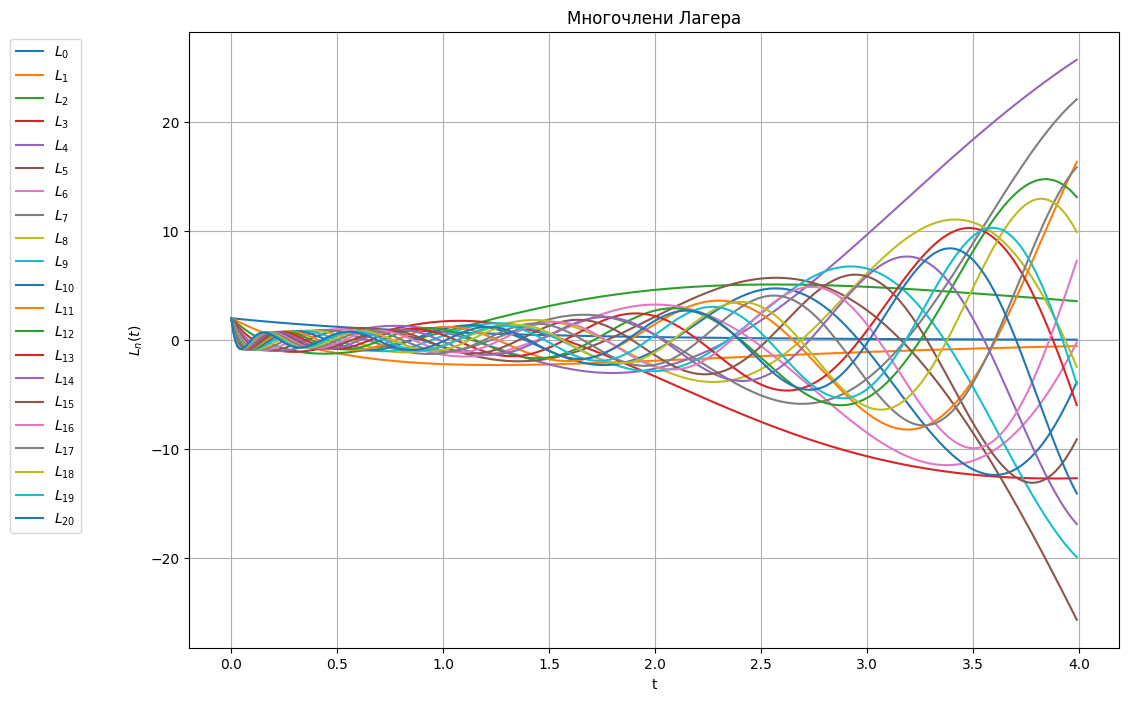

In [245]:
laguerre_polynomials_plot(
    t_max=4,
    n_max=20,
)

## Графік $\widetilde{f}^N(t), t\in[0, 2\pi]$ (1.5.8)

In [246]:
def laguerre_transform_plot(
        f: Callable[[float], float],
        n_max: int,
        t_max: float = np.pi * 2,
        t_step: float = 0.01,
        int_points: int = 10000,
        beta: float = 2.0,
        sigma: float = 4.0
) -> None:
    """
    Функція для побудови графіку перетворення Лагера
    
    :param f:           Функція, яку перетворюємо
    :param n_max:       Верхня межа степеня многочлена Лагера (N)
    :param t_max:       Максимальне значення аргументу
    :param t_step:      Крок аргументу
    :param int_points:  Кількість точок для інтегрування
    :param beta:        Параметр бета
    :param sigma:       Параметр сигма
    
    :return:            None
    """

    # Обчислення послідовності h
    h = laguerre_transform_tabulation(
        f=f,
        n_max=n_max,
        int_points=int_points,
        beta=beta,
        sigma=sigma
    )['L_n'].tolist()

    # Табулювання
    T = np.arange(0, t_max, t_step)
    inverse_laguerre_transform_tabulation = pd.DataFrame(
        data={
            't': T,
            'h': [inverse_laguerre_transform(h=h, t=t, beta=beta, sigma=sigma) for t in T]
        }
    ).set_index('t')

    # Побудова графіків
    plt.figure(figsize=(12, 8))

    plt.plot(
        inverse_laguerre_transform_tabulation.index,
        inverse_laguerre_transform_tabulation['h'],
    )

    plt.title('Обернене перетворення Лагера')
    plt.xlabel('t')
    plt.ylabel(r'$\widetilde{f}^N(t)$')
    plt.grid()

    plt.show()

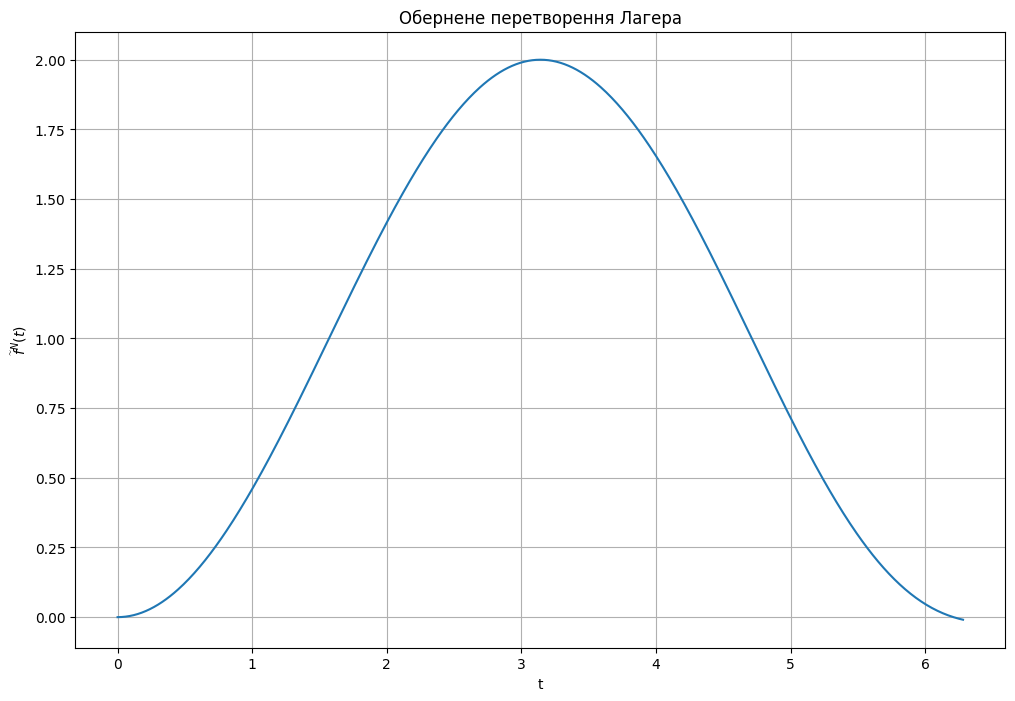

In [247]:
laguerre_transform_plot(
    f=f,
    n_max=20,
    int_points=10000
)